# Class Session 10 - Date Hubs and Party Hubs

## Comparing the histograms of local clustering coefficients of date hubs and party hubs

In this class, we will analyze the protein-protein interaction network for two classes of yeast proteins, "date hubs" and "party hubs" as defined by Han et al. in their 2004 study of protein-interaction networks and gene expression (Han et al., Nature, v430, p88, 2004). The authors of that study claimed that there is no difference in the local clustering density, between "date hubs" and "party hubs".  We will put this to the test. We for each of the "date hub" and "party hub" proteins, we will compute its local clustering coefficient (Ci) in the protein-protein interaction network.  We will then histogram the Ci values for the two sets of hubs, so that we can compare the distributions of local clustering coefficients for "date hubs" and "party hubs". We will use a statistical test (Kolmogorov-Smirnov) to compare the two distributions of Ci values.

To get started, we load the packages that we will require:

In [1]:
suppressPackageStartupMessages(library(igraph))

Next, we'll load the file of hub types `shared/han_hub_data.txt` (which is a two-column TSV file in which the first column is the protein name and the second column contains the string `date` or `party` for each row; the first row of the file contains the column headers), using our old friend `read.table`. 

In [2]:
hub_data <- read.table("shared/han_hub_data.txt", 
                       sep="\t",
                       header=TRUE,
                       stringsAsFactors=FALSE)

Let's take a peek at the structure of the `hub_data` data frame, using `head` and `dim`.  Here's what it should look like:

In [3]:
head(hub_data)

Protein,HubType
<chr>,<chr>
ACT1,date
ADA2,date
AKR1,party
APC1,party
APC11,date
APC2,party


In [4]:
dim(hub_data)

[1] 199   2

Next, let's load the file of yeat protein-protein interaction network edges `shared/han_network_edges.txt` (which is a two-column file, with first column is the first protein in the interacting pair, and the second column is the second protein in the interacting pair)

In [5]:
edge_df <- read.table("shared/han_network_edges.txt",
                     sep="\t",
                     header=TRUE,
                     stringsAsFactors=FALSE)

Let's take a peek at the data frame `edge_df`, using `head` and `dim`:

In [6]:
head(edge_df)

PROTEINA,PROTEINB
<chr>,<chr>
AAR2,PRP8
ABP1,SRV2
ABP1,ACT1
ABP1,RVS167
ACT1,IQG1
ACT1,SRV2


In [7]:
dim(edge_df)

[1] 2523    2

It will be convenient to let `igraph` compute the local clustering coefficients.  So, we'll want to make an undirected igraph `Graph` object from the edgelist data, using our old friend `graph_from_data_frame`:

In [8]:
ppi_graph <- graph_from_data_frame(edge_df, directed=FALSE)

As always, we'll use `summary` to sanity check the `Graph` object:

In [9]:
summary(ppi_graph)

IGRAPH 0fe33ca UN-- 1344 2523 -- 
+ attr: name (v/c)


Now we'll need to get the igraph vertex index values of the proteins that are date hubs or party hubs. To do this, we'll first need to make a data frame containing (in the first column, "Protein") the names of the proteins in the vertex order of the `Graph` object, and (in the second column "order") the integer vertex indexes of the proteins.  We'll do this using the `data.frame` function, the `V` function in `igraph`, and the `:` operator to get a range of integers.

In [10]:
graph_vertices_df = data.frame(Protein=V(ppi_graph)$name, order=1:length(V(ppi_graph)))

Let's check our work, using the `head` and `dim` functions:

In [11]:
head(graph_vertices_df)

Protein,order
<fct>,<int>
AAR2,1
ABP1,2
ACT1,3
ADA2,4
AFG3,5
AFR1,6


In [12]:
dim(graph_vertices_df)

[1] 1344    2

Now we'll need to merge the `graph_vertices_df` data frame with the `hub_data` data frame, to connect the hub type information with the igraph vertex index information.  We'll do this using the `merge` function, passing `x=graph_vertices_df`, `y=hub_data`. We'll also need to specify that the columns to be joined are column 1 of `graph_vertices_df` (using the `on.x` argument to `merge`) and column 2  

In [13]:
graph_vertices_df <- merge(graph_vertices_df, hub_data, on.x=1, on.y=1, all.x=TRUE, sort=FALSE)
graph_vertices_df_sorted <- graph_vertices_df[order(graph_vertices_df$order),c(1,3)]

In [14]:
head(graph_vertices_df_sorted)

,Protein,HubType
,<fct>,<chr>
200,AAR2,NA
201,ABP1,NA
1,ACT1,date
2,ADA2,date
204,AFG3,NA
205,AFR1,NA


In [15]:
dim(graph_vertices_df_sorted)

[1] 1344    2

Use `which` in order to find the index numbers of the proteins that are "date hubs" and that are "party hubs":

In [16]:
date_hub_inds <- which(graph_vertices_df_sorted$HubType=="date")
party_hub_inds <- which(graph_vertices_df_sorted$HubType=="party")

As a sanity check, print out the number of date hubs and party hubs that you find

In [17]:
print(sprintf("number of date hubs: %d", length(date_hub_inds)))
print(sprintf("number of party hubs: %d", length(party_hub_inds)))

[1] "number of date hubs: 91"
[1] "number of party hubs: 108"


Now let's use the `transitivity` function in igraph to compute the local clustering coefficients for every vertex in the graph. You'll want to specify `type="local"` in your call to `transitivity`. Print out the first six components of the vector of data returned, as a sanity check.  Question:  why are some of them `NaN`?  Is this normal?

In [18]:
local_clust_coeffs <- transitivity(ppi_graph, type="local")
head(local_clust_coeffs)

[1]        NaN 0.66666667 0.05147059 0.68131868        NaN 0.00000000

Plot the histograms of the local clustering coefficients of the "date hubs" and the "party hubs".

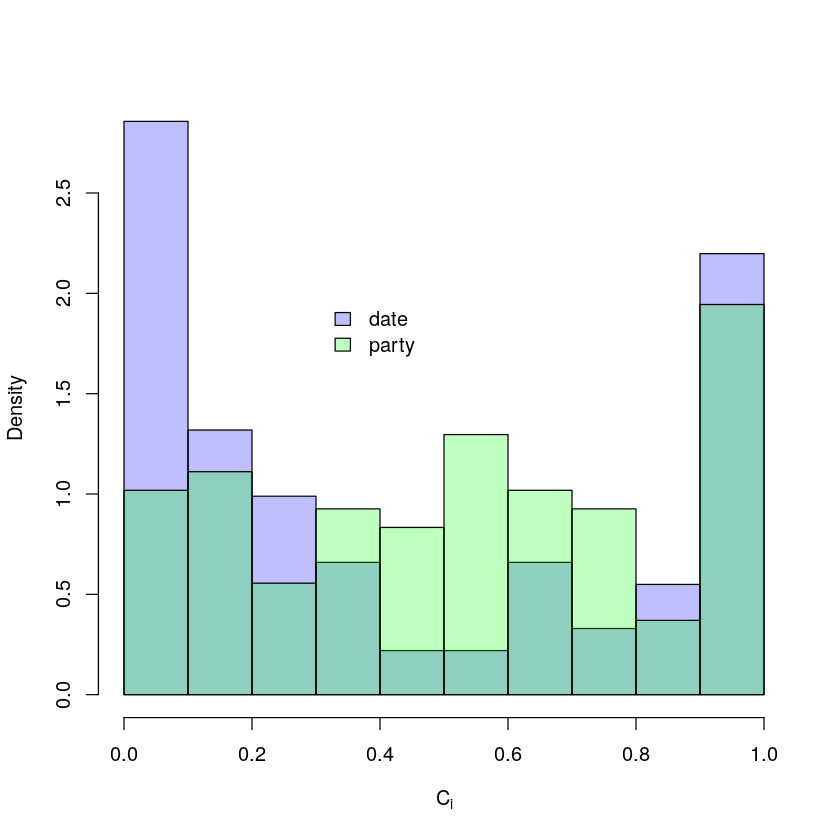

In [19]:
nbreaks <- 10
breaks <- (0:nbreaks)/nbreaks
hist_date <- hist(local_clust_coeffs[date_hub_inds], breaks=breaks, plot=FALSE)
hist_party <- hist(local_clust_coeffs[party_hub_inds], breaks=breaks, plot=FALSE)
plotvals <- 0.5*(breaks[1:nbreaks] + breaks[2:(nbreaks+1)])
plot(hist_date, col=rgb(0,0,1,1/4), xlab=expression(C[i]), main="", freq=FALSE)
plot(hist_party, col=rgb(0,1,0,1/4), add=TRUE, freq=FALSE)
legend(0.3, 2, bty="n", legend=c("date","party"), fill=c(rgb(0,0,1,1/4),rgb(0,1,0,1/4)))

Now let's compare these two histograms by a Kolmogorov-Smirnov test, using the `ks.test` function:

In [20]:
print(ks.test(local_clust_coeffs[date_hub_inds],
              local_clust_coeffs[party_hub_inds]))

Warning message in ks.test(local_clust_coeffs[date_hub_inds], local_clust_coeffs[party_hub_inds]):
“cannot compute exact p-value with ties”



	Two-sample Kolmogorov-Smirnov test

data:  local_clust_coeffs[date_hub_inds] and local_clust_coeffs[party_hub_inds]
D = 0.26241, p-value = 0.002224
alternative hypothesis: two-sided



What is the *p*-value for this test?  What conclusion do you draw from that *p*-value?

When comparing two distributions, it is convenient to use a q-q (quantile-quantile) plot.  In R, you can do this using the built-in function `qqplot`. Let's do this for the distributions of Ci values for date hubs and party hubs.

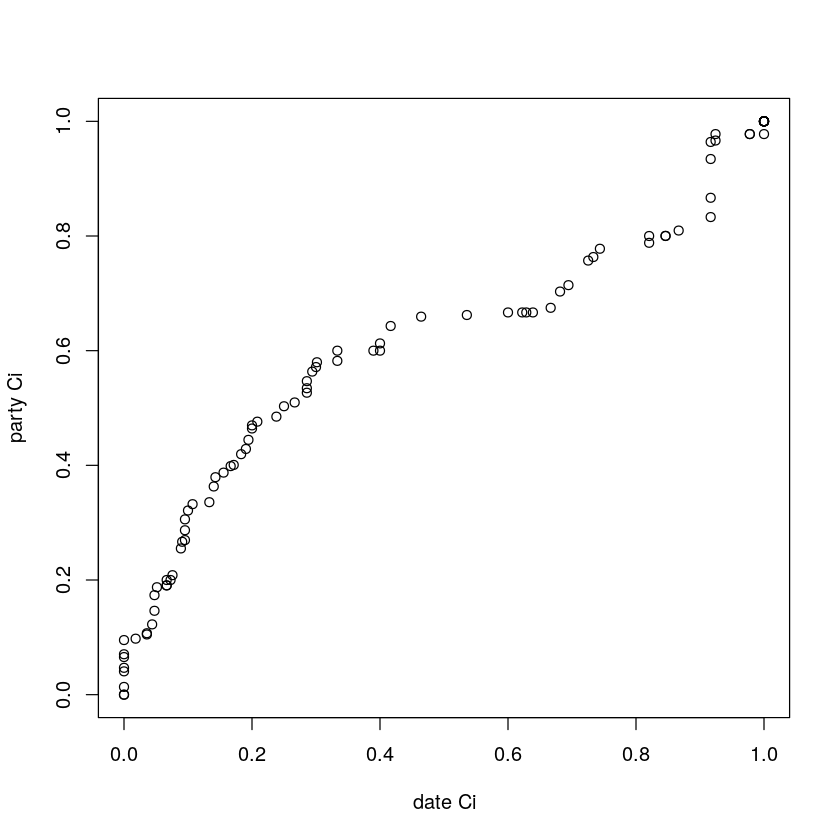

In [21]:
qqplot(local_clust_coeffs[date_hub_inds],local_clust_coeffs[party_hub_inds],xlab="date Ci",ylab="party Ci")

In [22]:
ci_values_date_hubs <- local_clust_coeffs[date_hub_inds]
ci_values_party_hubs <- local_clust_coeffs[party_hub_inds]